# plot() Examples

In [1]:
__author__    = 'Steve Nicholes'
__copyright__ = 'Copyright (C) 2018 Steve Nicholes'
__license__   = 'GPL v3'
__version__   = '0.3.0'

## Setup

### Imports

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path = [r'C:\GitHub\fivecentplots'] + sys.path
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace
fcp

<module 'fivecentplots' from 'C:\\GitHub\\fivecentplots\\fivecentplots\\__init__.py'>

### Sample data

In [3]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data.csv'))

### Set theme

In [4]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [5]:
SHOW = False

## XY Plots

### Scatter

A simple XY plot with no lines or legend

Voltage vs I [A].png


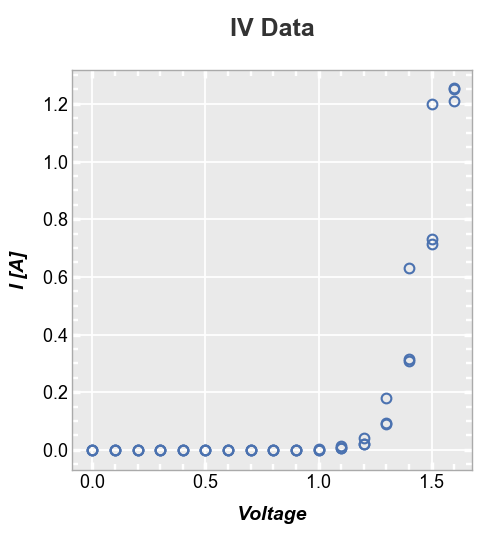

Wall time: 1.54 s


In [6]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', inline=True, title='IV Data', lines=False, show=SHOW, \
              filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Legend

Add a legend by the column "Die"

Voltage vs I [A].png


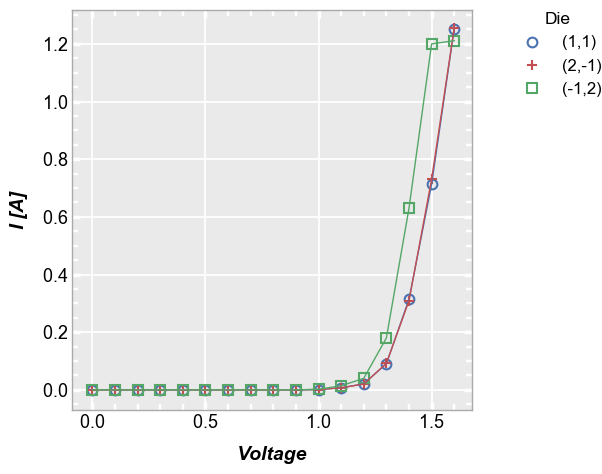

Wall time: 1.45 s


In [7]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', inline=True, show=SHOW, \
              filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Log scale

Log-scaled axes can be enabled through the kwargs "ax_scale".  Valid options:
* x-only: <font color="blue" style="font-family:'Courier New'"> logx | semilogx </font>
* y-only: <font color="blue" style="font-family:'Courier New'"> logy | semilogy </font>
* both: <font color="blue" style="font-family:'Courier New'"> loglog | log </font>
* symlog: <font color="blue" style="font-family:'Courier New'"> symlog </font> (doesn't work in matploblib 1.5.1)
* logit: <font color="blue" style="font-family:'Courier New'"> logit </font>

Voltage vs I [A].png


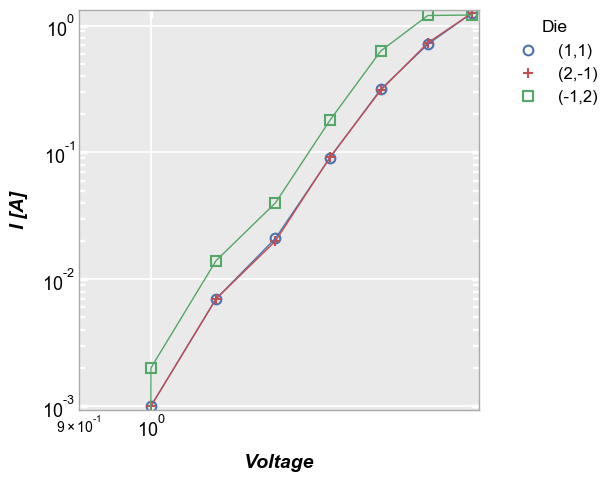

Wall time: 1.67 s


In [8]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', inline=True, show=SHOW, xmin=0.9,\
              filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

## Secondary x|y plots

### Shared x axis (twinx)

In [9]:
%time fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], legend='Die', inline=True, twinx=True, show=SHOW, \
              filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

AttributeError: 'FixedFormatter' object has no attribute 'set_scientific'

### Shared y axis (twiny)

bah2: axes[ia].get_xaxis().get_major_formatter().set_scientific(False)
Voltage vs Voltage.png


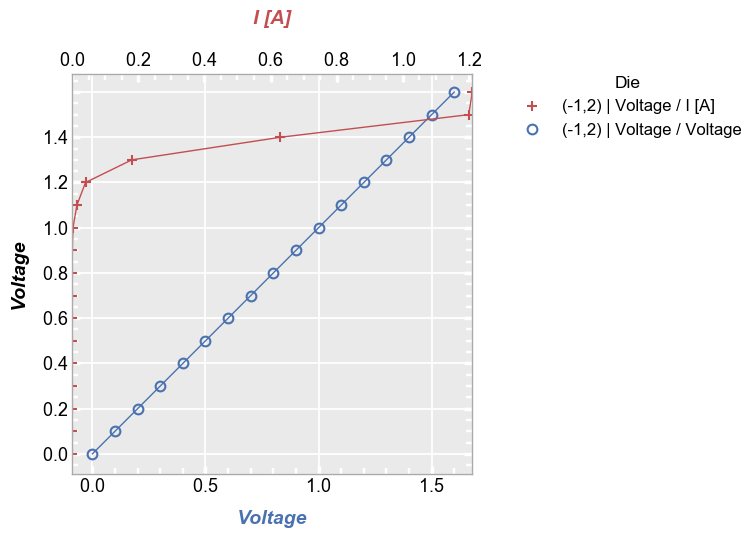

Wall time: 2.04 s


In [10]:
%time fcp.plot(df=df, x=['Voltage', 'I [A]'], y='Voltage', legend='Die', inline=True, twiny=True, show=SHOW, \
               filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

## Multiple x & y values

MORE. Notice the absence of the <font style="font-family:'Courier New'">twinx</font> and <font style="font-family:'Courier New'">twiny</font> parameters.

### Multiple y only

Voltage vs Boost Level + I [A].png


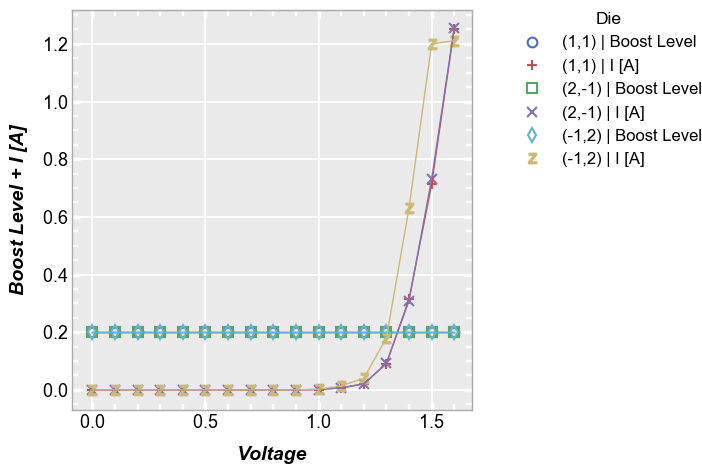

Wall time: 1.84 s


In [11]:
%time fcp.plot(df=df, x='Voltage', y=['Boost Level', 'I [A]'], legend='Die', inline=True, show=SHOW, \
               filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Multiple x only

Boost Level + I [A] vs Voltage.png


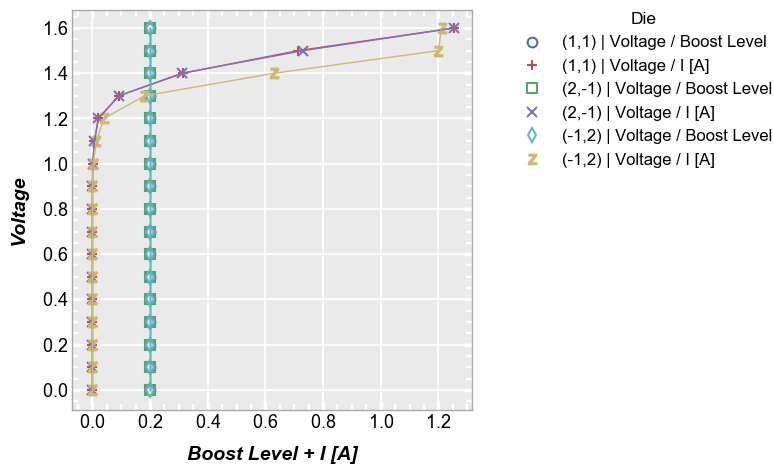

Wall time: 1.99 s


In [12]:
%time fcp.plot(df=df, x=['Boost Level', 'I [A]'], y='Voltage', legend='Die', inline=True, show=SHOW, \
               filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Both

Boost Level + I [A] vs Voltage + Temperature [C].png


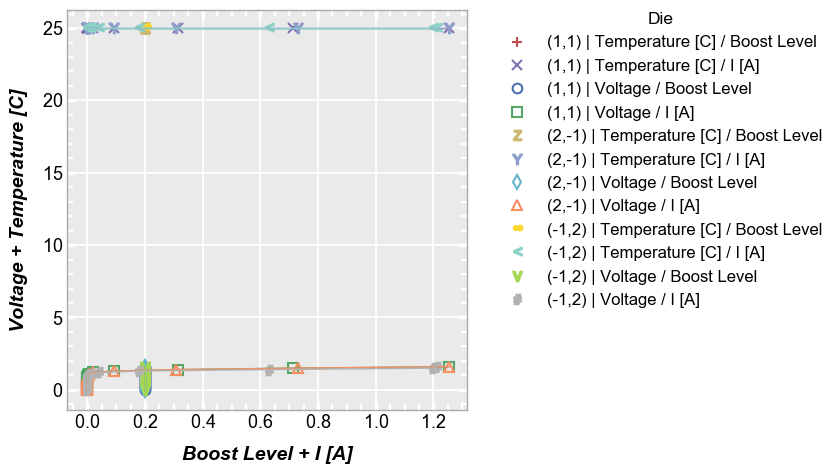

Wall time: 2.31 s


In [13]:
%time fcp.plot(df=df, x=['Boost Level', 'I [A]'], y=['Voltage', 'Temperature [C]'], legend='Die', show=SHOW, \
               filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

## Grid plots

### Row plot

Create a unique plot for each unique value of the "row" column in the specified DataFrame.  Plots are arranged row by row in a single column.  Each row contains a label indicating the unique value of the "row" column.

Voltage vs I [A] by Boost Level.png


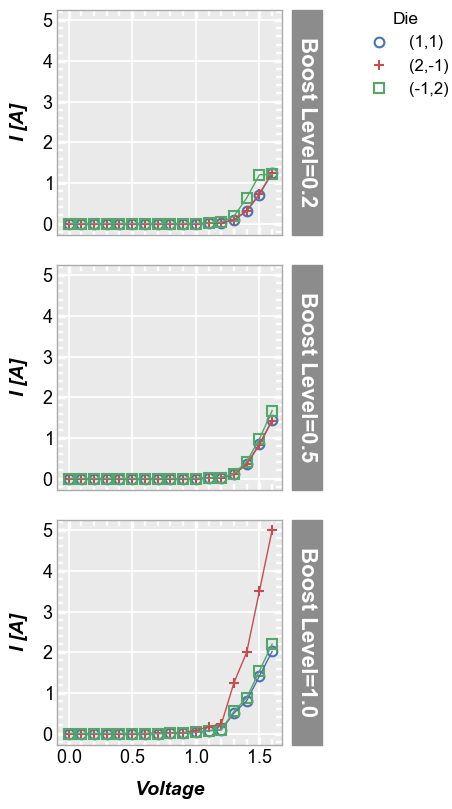

Wall time: 2.84 s


In [14]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', row='Boost Level', show=SHOW, ax_size=[225, 225], \
               filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

### Column plot

Create a unique plot for each unique value of the "col" column in the specified DataFrame.  Plots are arranged in a single row, column by column.  Each column contains a label indicating the unique value of the "col" column.

Voltage vs I [A] by Boost Level.png


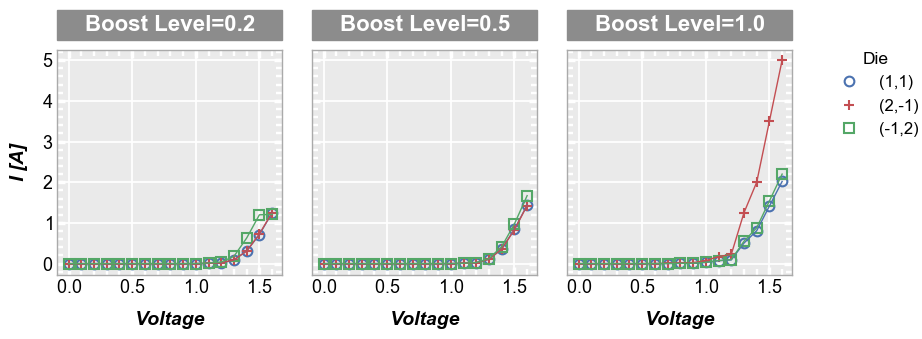

Wall time: 3.58 s


In [15]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', show=SHOW, ax_size=[225, 225], \
               filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

### Row x column grid

Remove "Temperature [C]" from the DataFrame subset and make a grid of plots for each unique combination of "row" and "col" values.  Both "row" and "col" labels are included.

Voltage vs I [A] by Temperature [C] by Boost Level.png


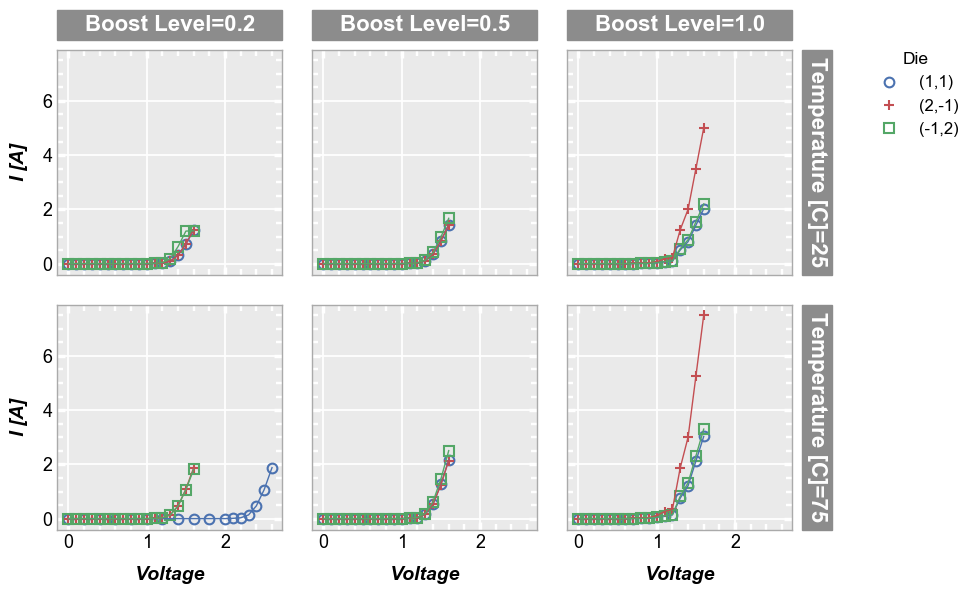

Wall time: 4.49 s


In [16]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', show=SHOW, \
               ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450')

### Wrap plot

A wrap plot is an alternate view of the row x column plot.  For wrap plots, the row and column labels are condensed into a  single label above each plot window and the spacing between plots is eliminated (by default; can be overriden).  The x and y sizes of the grid are determined by the square root of the total number of plot windows.  x and y axes ranges are shared.

Voltage vs I [A] by Temperature [C] + Boost Level.png


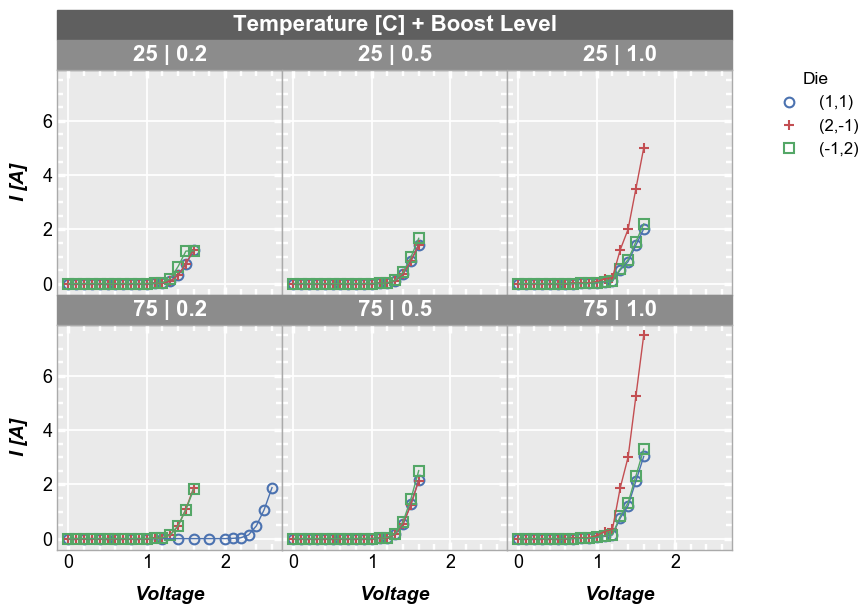

Wall time: 3.68 s


In [17]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'], show=SHOW, \
               ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450')